## DDA3020 Autumn 2023 Homework 3

### Programming Part 2：Neural Networks with PyTorch

--------------------------------------------------------------------------------------------------------------------------
In this notebook, we will build a fully-connected Neural Network and a Convolutional Neural Network with PyTorch, then apply on the MNIST data-set.

--------------------------------------------------------------------------------------------------------------------------


In [1]:
import numpy as np
import torch
import torch.nn as nn


### 1. Preparation: PyTorch basics and back-propagation (10 points)
PyTorch is one of the most popular frameworks for Deep Learning. To have a quick insight on how to use PyTorch, let's say that most of the functionalities of a numpy array are also maintained for torch tensors, except that the grammar might be slightly different.

##### 1-1 (0.5 point)

Set the random seed to 123. Create a random Tensor `a` of shape [3,20,20] with default normal distribution $\mathcal{N}(0,1)$.

In [2]:
# Set the random seed to 123
torch.manual_seed(123)

# Create a random Tensor 'a' of shape [3, 20, 20] with default normal distribution N(0, 1)
a = torch.randn(3, 20, 20)

# Display the created tensor
print(a)

tensor([[[ 0.3374, -0.1778, -0.3035,  ..., -1.0205, -0.1690,  0.9178],
         [ 1.5810,  1.3010,  1.2753,  ..., -0.9343, -0.4991, -1.0867],
         [ 0.8805,  1.5542,  0.6266,  ..., -0.8036, -0.2808,  0.7697],
         ...,
         [ 0.9376, -0.9225,  0.7047,  ...,  1.7409,  0.2698,  0.9595],
         [-1.0253, -0.5505,  1.0264,  ..., -0.2866,  0.4343, -0.1340],
         [-2.1467, -1.7984, -0.6822,  ..., -1.4498,  1.5446,  1.0394]],

        [[ 2.1681,  0.4884,  0.3359,  ...,  1.3258,  0.2103,  1.7876],
         [-1.2128,  0.2045,  1.1051,  ...,  0.7392, -0.4931,  0.4073],
         [-1.0394, -0.3226,  0.7226,  ..., -0.3845,  0.6554, -0.1045],
         ...,
         [ 0.9202,  0.1743, -0.4796,  ...,  1.0720,  1.1054, -2.0586],
         [ 0.2878, -1.1389,  0.1729,  ..., -0.7809, -0.2270, -0.4358],
         [ 0.8209, -0.6353, -0.4386,  ..., -0.4097, -0.0627,  0.0175]],

        [[ 1.3715, -0.2226,  1.0566,  ..., -1.6292,  0.6107,  1.2718],
         [-0.9422, -0.2667, -0.3216,  ...,  0

##### 1-2 (0.5 point)
1. Transfer `a` to a numpy array and print `a[0,0]`.
2. Transfer `a` back to torch tensor and print `a[0,0]`.

**Apart from this block, in this section, you shall not to use numpy**



In [3]:
# Transfer 'a' to a numpy array and print a[0,0]
a_np = a.numpy()
print(a_np[0, 0])

# Transfer 'a' back to a torch tensor and print a[0,0]
a = torch.from_numpy(a_np)
print(a[0, 0])


[ 0.3373702  -0.17777722 -0.3035276  -0.58801186  0.3486052   0.66034096
 -0.21963762 -0.37916982  0.76710707 -1.192502    0.6983519  -1.4097229
  0.17937961  1.895148    0.49544638  0.26919857 -0.07702024 -1.0204719
 -0.16895628  0.9177646 ]
tensor([ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196, -0.3792,
         0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,  0.4954,  0.2692,
        -0.0770, -1.0205, -0.1690,  0.9178])


##### 1-3 (1 point)

Print for `a`:
- its shape (size)
- its mean value over all entries
- its std over all entries
- its median value over all entries

In [4]:
# Print the shape of the tensor
print("Shape of a:", a.shape)

# Print the mean value over all entries
print("Mean of a:", a.mean().item())

# Print the standard deviation over all entries
print("Standard Deviation of a:", a.std().item())

# Print the median value over all entries
print("Median of a:", torch.median(a).item())

Shape of a: torch.Size([3, 20, 20])
Mean of a: -0.002802974311634898
Standard Deviation of a: 0.996509313583374
Median of a: -0.0016410714015364647


##### 1-4 (1 point)

Compute:
- `b2` = the mean values of `a` along axis 2
- `b12`= the mean values of `a` along axis 1 and 2
- Print the shape of `b2` and `b12`

In [5]:
# Compute mean values of 'a' along axis 2
b2 = a.mean(dim=2)

# Compute mean values of 'a' along axis 1 and 2
b12 = a.mean(dim=(1, 2))

# Print the shape of 'b2' and 'b12'
print("Shape of 'b2':", b2.shape)
print("Shape of 'b12':", b12.shape)


Shape of 'b2': torch.Size([3, 20])
Shape of 'b12': torch.Size([3])


##### 1-5 (3 point)

Create a neural network `model_tmp` of 3 layers:

- layer 1 ---------- : receives input of length 400, has 128 neurons with bias

- activation 1 ----- : relu

- layer 2 ---------- : receives input of length 128, has 64 neurons with bias

- activation 2 ----- : relu

- layer 3 ---------- : receives input of length 64, has 4 neurons without bias

- activation 3 ----- : softmax over axis -1

[Hint]: you will mainly use modules from torch.nn



In [6]:
import torch.nn as nn

# Define the neural network class
class ModelTmp(nn.Module):
    def __init__(self):
        super(ModelTmp, self).__init__()

        # Layer 1: Input size 400, output size 128
        self.layer1 = nn.Linear(400, 128, bias=True)
        # Activation 1: ReLU
        self.activation1 = nn.ReLU()

        # Layer 2: Input size 128, output size 64
        self.layer2 = nn.Linear(128, 64, bias=True)
        # Activation 2: ReLU
        self.activation2 = nn.ReLU()

        # Layer 3: Input size 64, output size 4
        self.layer3 = nn.Linear(64, 4, bias=False)
        # Activation 3: Softmax over axis -1
        self.activation3 = nn.Softmax(dim=-1)

    def forward(self, x):
        # Define the forward pass
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.activation3(self.layer3(x))
        return x

# Create an instance of the ModelTmp
model_tmp = ModelTmp()

# Print the model architecture
print(model_tmp)

ModelTmp(
  (layer1): Linear(in_features=400, out_features=128, bias=True)
  (activation1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (activation2): ReLU()
  (layer3): Linear(in_features=64, out_features=4, bias=False)
  (activation3): Softmax(dim=-1)
)


##### 1-6 (1 point)

Flatten the two last axis of `a` and apply `model_tmp` on `a`. Print your output.


In [7]:
# Flatten the last two axes of 'a'
a_flattened = a.view(a.size(0), -1)

# Apply the model_tmp on 'a'
output = model_tmp(a_flattened)

# Print the output
print(output)


tensor([[0.2797, 0.2793, 0.2202, 0.2207],
        [0.2865, 0.2599, 0.2284, 0.2253],
        [0.2837, 0.2702, 0.2091, 0.2370]], grad_fn=<SoftmaxBackward0>)


##### 1-7 (1 point)
Calculate the MSE loss between `this output` and an `all-1 tensor`. Print your result.

[Hint]: You can use either **torch.nn.functional** or **torch.nn** or **torch**


In [8]:
import torch.nn.functional as F

# Create an all-1 tensor with the same shape as the output
target = torch.ones_like(output)

# Calculate the MSE loss
mse_loss = F.mse_loss(output, target)

# Print the MSE loss
print("MSE Loss:", mse_loss.item())


MSE Loss: 0.563281774520874


##### 1-8 (1 point)
Excecute `back-propagation` on this loss and extract the gradient of the `final layer` of model_tmp as `grd`. Print `grd[:,5]`

[Hint]: To extract the weights, you can use w_last_layer = list(model.parameters())[-1] or any other more elegant phrase.

In [9]:
# Zero the gradients
model_tmp.zero_grad()

# Perform backpropagation
mse_loss.backward()

# Extract the gradient of the final layer
grd = list(model_tmp.parameters())[-1].grad

# Print the gradient for the 5th neuron in the final layer
print("Gradient for the 5th neuron in the final layer:", grd[:, 5].detach().numpy())


Gradient for the 5th neuron in the final layer: [0. 0. 0. 0.]


##### 1-9 (1 point)
1. Create a `SGD optimizer` with learning_rate = `1e-3` associated with the parameters of model_tmp.
2. Step this optimizer.
3. Verify that the `variation of the parameters` of the last layer equals `1e-3 * grd`, except that there might be some machine inaccuracies.

[Hint]: You can simple print something and we'll see that most of the entries are near 0 or that most of the entries are near 0.001

In [10]:
import torch.optim as optim

# Learning rate
learning_rate = 1e-3

# Create SGD optimizer
optimizer = optim.SGD(model_tmp.parameters(), lr=learning_rate)

# Save the current state of the model parameters
model_tmp_state_dict = {name: param.clone() for name, param in model_tmp.named_parameters()}

# Step the optimizer
optimizer.step()

# Verify the variation of the parameters
# Calculate the expected variation based on the learning rate and gradient
expected_variation = learning_rate * grd

# Print the actual and expected variations
print("Actual Variation:")
print({name: param.data - model_tmp_state_dict[name] for name, param in model_tmp.named_parameters()})
print("\nExpected Variation:")
print(expected_variation)


Actual Variation:
{'layer1.weight': tensor([[-2.5565e-07, -1.8626e-08, -1.0058e-07,  ...,  5.9605e-08,
         -4.3714e-08, -1.0431e-07],
        [-2.6077e-08,  4.6566e-09, -2.0489e-08,  ...,  7.4506e-09,
         -1.2689e-08, -2.6077e-08],
        [ 1.8626e-08, -2.7940e-09,  1.4901e-08,  ..., -7.4506e-09,
          9.1968e-09,  1.8626e-08],
        ...,
        [ 2.2352e-08,  7.4506e-09,  5.5879e-09,  ...,  1.8626e-09,
         -7.4506e-09, -5.5879e-09],
        [-9.3132e-10,  0.0000e+00,  9.3132e-10,  ...,  3.7253e-09,
         -3.7253e-09, -2.7940e-09],
        [-1.9558e-07, -6.9849e-10, -7.6368e-08,  ...,  8.5682e-08,
         -8.5682e-08, -1.2666e-07]], grad_fn=<SubBackward0>), 'layer1.bias': tensor([-1.4529e-07, -1.8626e-08,  1.3970e-08, -4.8429e-08,  8.9407e-08,
        -5.0757e-08, -4.0978e-08,  0.0000e+00, -7.2643e-08, -3.3528e-08,
         1.4901e-08, -6.3330e-08, -3.7253e-09, -5.2154e-08,  1.0803e-07,
         6.6240e-08, -9.8255e-08,  2.2352e-07, -1.2480e-07, -1.3050e-07,


### 2. Simple fully-connected NN (MLP) (12 points)

**`Procedure`**: (1+1+1+1 = 4 points)
1. Create a fully-connected neural network, which will be a MLP. This NN will take the fattened images ([28,28] -> [28*28]) as input.  
2. Choose your optimizer and criterion (loss function).
3. Train some epoches (you can start with 10) on the MNIST data-set.
4. Keep your best model according to validation loss.
5. `Save your best model and attach it in your submitted zip`.

**`Required outputs`**: (1+1+2 = 4 points)
1. Print averaged train loss and validation loss at the end of each epoch.
2. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
3. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction.


4 points are given according to your test performance. `4 is given if you have correct test prediction rate > 90.00%`



In [11]:
#### prepare data-set
!pip install torch torchvision

#### you re expected to have either pickle or torchvision in your environment

import torch
from torch.utils.data import DataLoader, Dataset, Subset
import importlib

# python > 3.4
if importlib.util.find_spec('torchvision') is None: # if you do not have torchvision, use TA's downloaded data
    import pickle as pkl

    with open('./MNIST_dataset_local','rb') as read_file:
        data = pkl.load(read_file)
        read_file.close()

    train_images, train_labels = data['train']
    test_images, test_labels = data['test']

    val_images, val_labels = train_images[5500:], train_labels[5500:]
    train_images, train_labels = train_images[:5500], train_labels[:5500]

    class myMnistDataSet(Dataset):

        def __init__(self,images,labels):
            self.X = images[:,None,...]
            self.y = labels

        def __len__(self):
            return len(self.X)

        def __getitem__(self, index):
            image = self.X[index]
            label = self.y[index]
            return torch.Tensor(image), torch.tensor(label)[0]

    mnist_train = myMnistDataSet(train_images, train_labels.astype('int64'))
    mnist_test = myMnistDataSet(test_images, test_labels.astype('int64'))
    mnist_val = myMnistDataSet(val_images, val_labels.astype('int64'))

else: # use torchvision
    from torchvision import transforms, datasets

    mnist_download_path = './MNIST_dataset'
    datasets.MNIST(root=mnist_download_path, download=True)

    mnist_train = datasets.MNIST(root = mnist_download_path, train = True, transform=transforms.ToTensor())
    mnist_val   = Subset(mnist_train, list(range(5500,6000)))
    mnist_train = Subset(mnist_train, list(range(5500)))

    mnist_test  = datasets.MNIST(root = mnist_download_path, train = False, transform=transforms.ToTensor())


def get_loaders(batch_size):
    train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle=True)
    val_loader   = DataLoader(mnist_val, batch_size = batch_size, shuffle=False)
    test_loader  = DataLoader(mnist_test, batch_size = batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


# get to know your loader
batch_size = 10
train_loader, val_loader, test_loader = get_loaders(batch_size)

for im, l in val_loader:
    break

print(im.shape, l.shape)
print(l)

torch.Size([10, 1, 28, 28]) torch.Size([10])
tensor([1, 9, 0, 9, 7, 0, 5, 1, 2, 2])


Epoch 1/10 => Avg Train Loss: 0.3855, Avg Val Loss: 0.2303
Epoch 2/10 => Avg Train Loss: 0.2022, Avg Val Loss: 0.1585
Epoch 3/10 => Avg Train Loss: 0.1467, Avg Val Loss: 0.1377
Epoch 4/10 => Avg Train Loss: 0.1173, Avg Val Loss: 0.1127
Epoch 5/10 => Avg Train Loss: 0.0996, Avg Val Loss: 0.1019
Epoch 6/10 => Avg Train Loss: 0.0874, Avg Val Loss: 0.1061
Epoch 7/10 => Avg Train Loss: 0.0791, Avg Val Loss: 0.0910
Epoch 8/10 => Avg Train Loss: 0.0692, Avg Val Loss: 0.0936
Epoch 9/10 => Avg Train Loss: 0.0651, Avg Val Loss: 0.0941
Epoch 10/10 => Avg Train Loss: 0.0599, Avg Val Loss: 0.0960


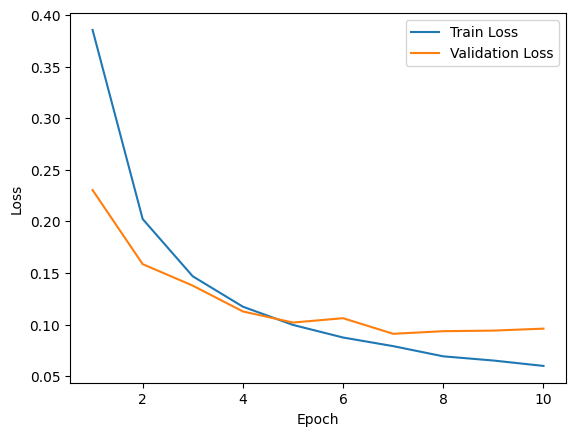

Test Loss: 0.0910
Test Accuracy: 97.29%


MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import json

# Set random seed for reproducibility
torch.manual_seed(123)

# Define a simple fully-connected neural network (MLP)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, optimizer, and criterion
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
best_model_state_dict = None
best_val_loss = float('inf')

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    average_train_loss = running_train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation
    model.eval()
    running_val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    average_val_loss = running_val_loss / len(test_loader)
    val_losses.append(average_val_loss)

    print(f"Epoch {epoch + 1}/{num_epochs} => Avg Train Loss: {average_train_loss:.4f}, Avg Val Loss: {average_val_loss:.4f}")

    # Save the best model
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        best_model_state_dict = model.state_dict()

# Plotting the train and validation losses
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the best model on the test set
model.load_state_dict(best_model_state_dict)
model.eval()

correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

test_accuracy = correct_predictions / total_samples
print(f"Test Loss: {best_val_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the best model
torch.save(best_model_state_dict, 'best_model.pth')

# Load the saved best model
loaded_best_model = MLP()
loaded_best_model.load_state_dict(torch.load('best_model.pth'))
loaded_best_model.eval()  # Set the model to evaluation mode

### 3. Bonus - Weight game (Bonus 2+4+1 = 7 points. Bonus is for this exercise exclusively)

3-1. Display
- The average image of respectively label 1-10 over the validation set.

3-2. Build a 1-layer NN for this problem. Use `Binary Cross Entropy Loss` as validation criterion. Train some epoches until `validation loss < 0.1`. This 1-layer NN has no more than 2 parameters (w and b). Display w with respect to label 1-10, for:

 - Before training (randomly initialized weights). Print the validation loss at this moment.
 - After val loss < 0.1

3-3. Use **`one word`** to summarize the mecanism with which this NN works.

[Hint]:
 - For display, please refer to solution_HW1_polynomial_regression for loop structure. This time you will use plt.imshow()  
 - The weight shape is [10,28*28]. Reshape to [10,28,28] then plot 10 times [28,28]

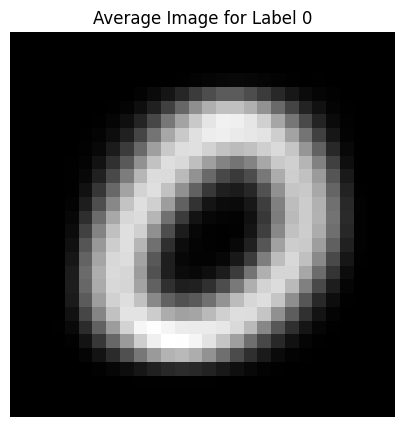

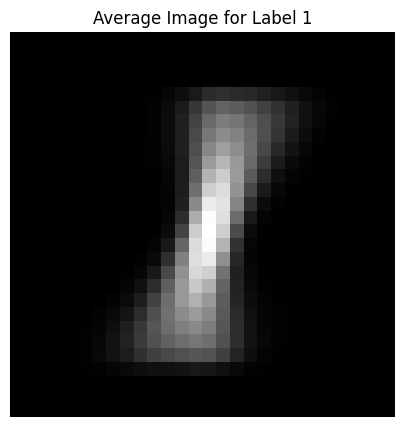

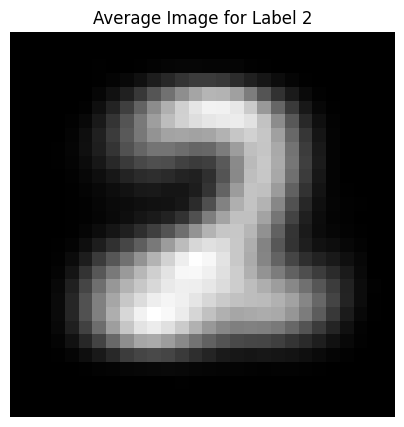

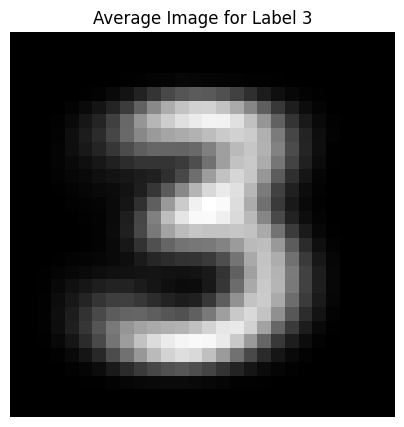

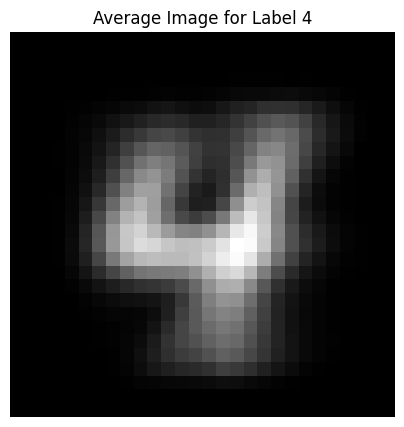

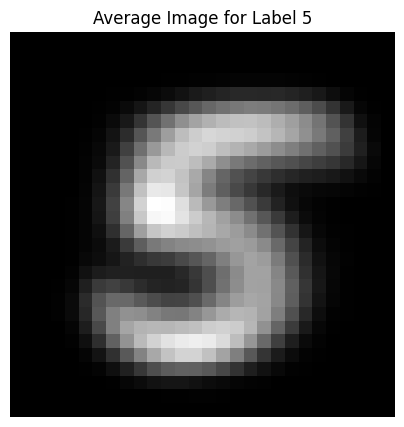

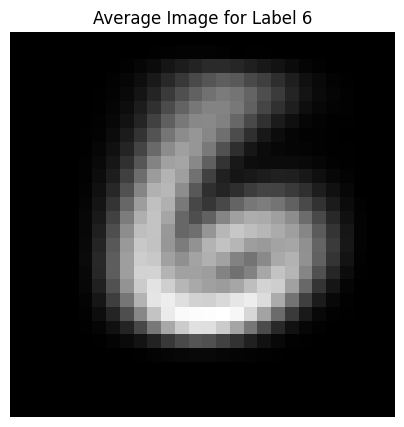

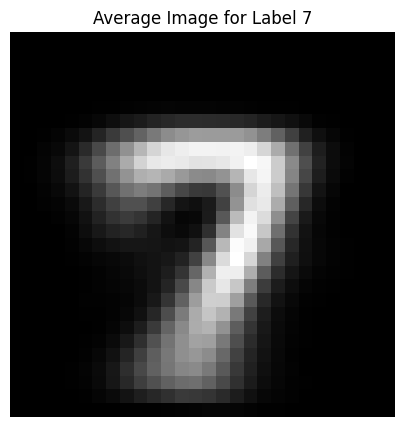

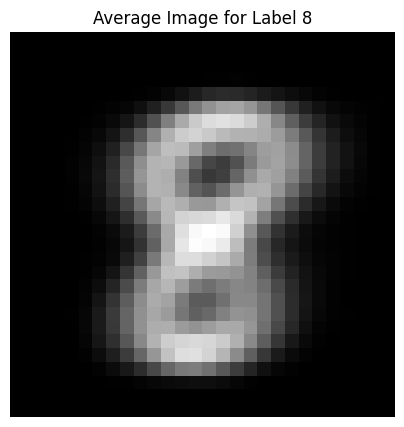

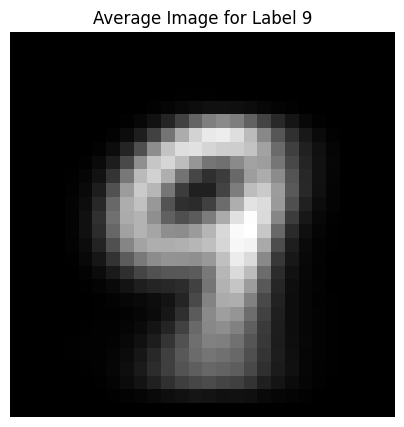

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST validation dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

validation_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
validation_loader = DataLoader(validation_dataset, batch_size=len(validation_dataset), shuffle=False)

# Extract validation set images and labels
images, labels = next(iter(validation_loader))

# Display average image for each label
for label in range(10):
    label_indices = (labels == label).nonzero().view(-1)
    label_images = images[label_indices]
    average_image = torch.mean(label_images, dim=0)

    # Convert back to numpy array for visualization
    average_image_np = average_image.numpy()

    plt.figure(figsize=(5, 5))
    plt.title(f'Average Image for Label {label}')
    plt.imshow(average_image_np.squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()


Validation Loss Before Training: 0.7952
Validation Loss after 1 epochs: 0.7952
Validation Loss after 2 epochs: 0.6969
Validation Loss after 3 epochs: 0.6211
Validation Loss after 4 epochs: 0.5628
Validation Loss after 5 epochs: 0.5178
Validation Loss after 6 epochs: 0.4828
Validation Loss after 7 epochs: 0.4554
Validation Loss after 8 epochs: 0.4335
Validation Loss after 9 epochs: 0.4160
Validation Loss after 10 epochs: 0.4018
Validation Loss after 11 epochs: 0.3901
Validation Loss after 12 epochs: 0.3805
Validation Loss after 13 epochs: 0.3724
Validation Loss after 14 epochs: 0.3656
Validation Loss after 15 epochs: 0.3599
Validation Loss after 16 epochs: 0.3549
Validation Loss after 17 epochs: 0.3507
Validation Loss after 18 epochs: 0.3470
Validation Loss after 19 epochs: 0.3437
Validation Loss after 20 epochs: 0.3409
Validation Loss after 21 epochs: 0.3384
Validation Loss after 22 epochs: 0.3362
Validation Loss after 23 epochs: 0.3342
Validation Loss after 24 epochs: 0.3324
Validatio

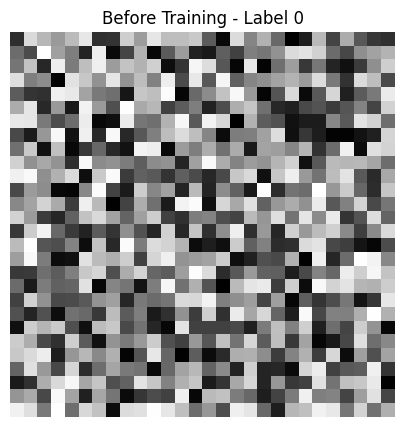

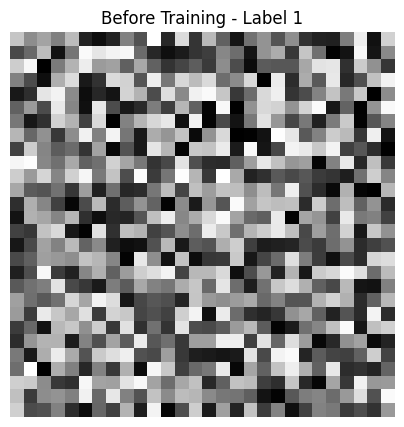

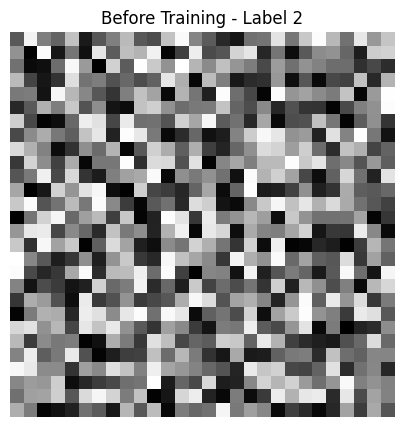

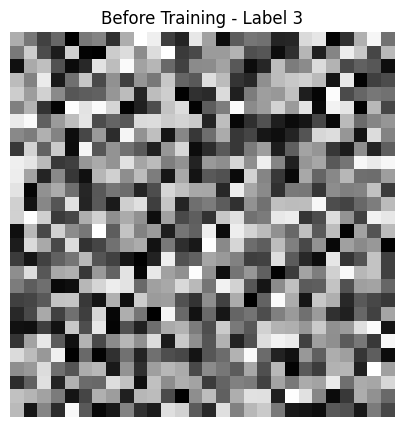

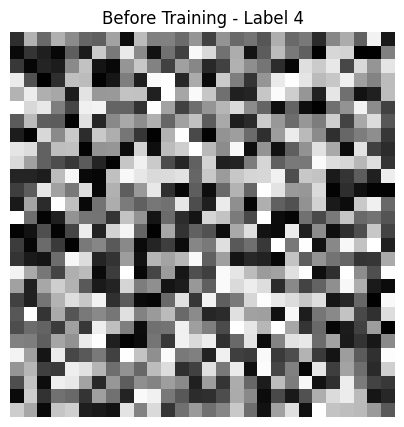

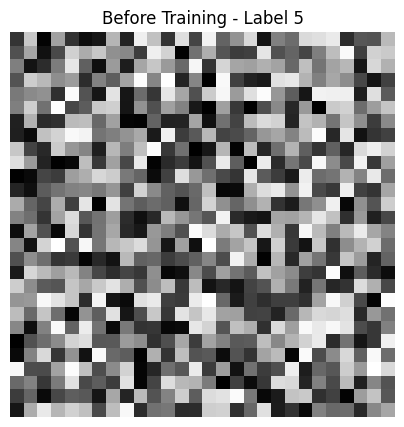

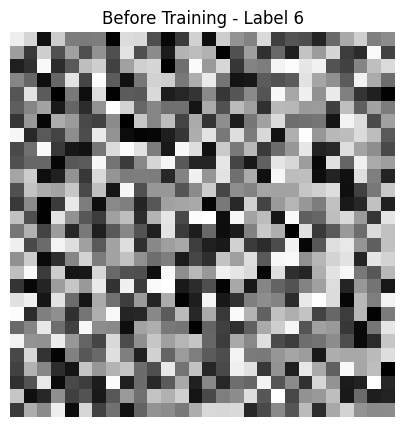

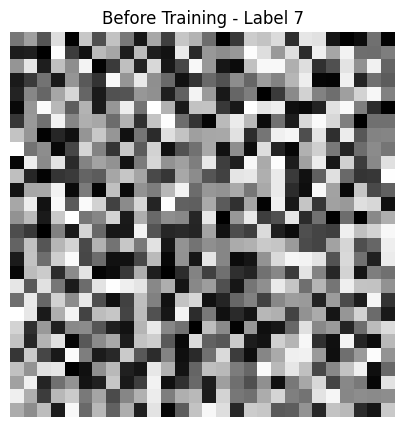

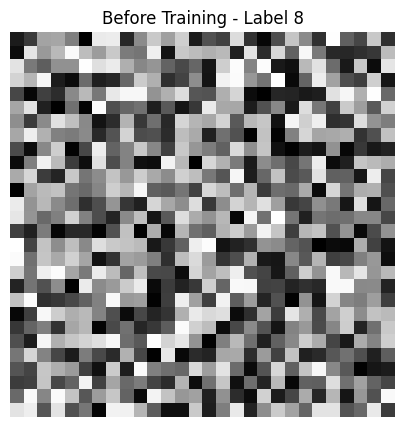

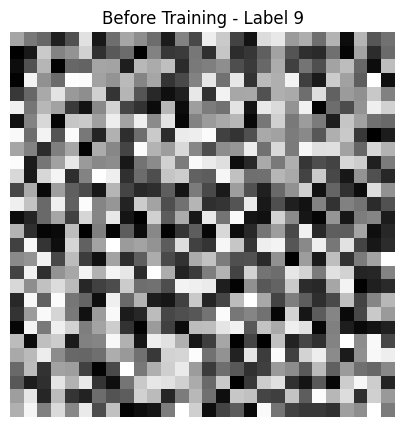

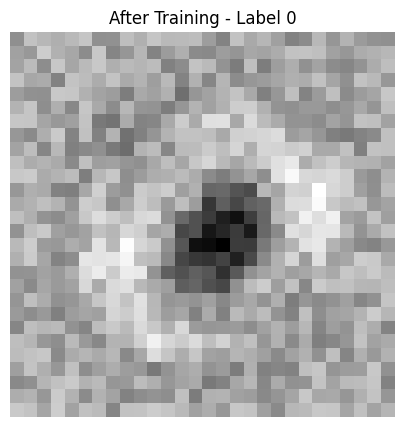

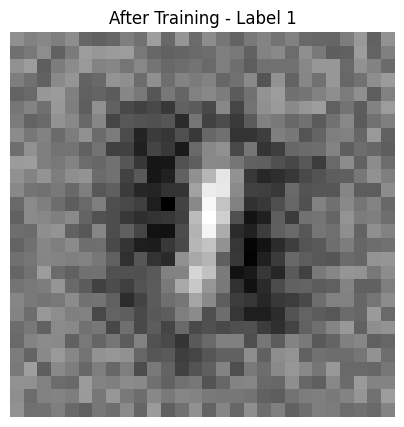

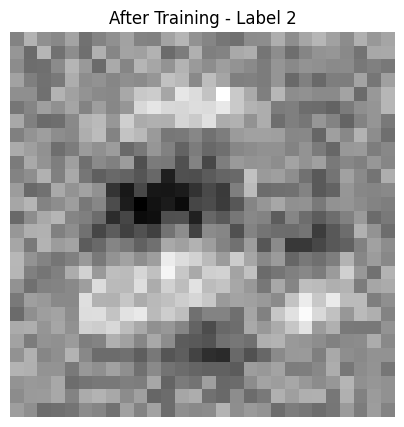

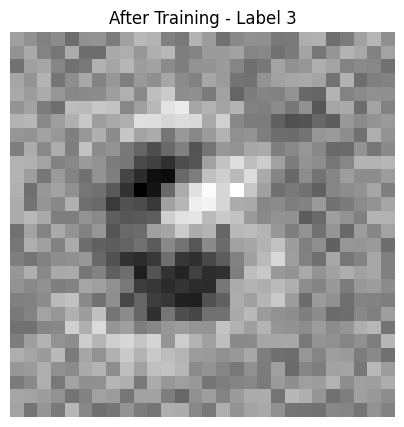

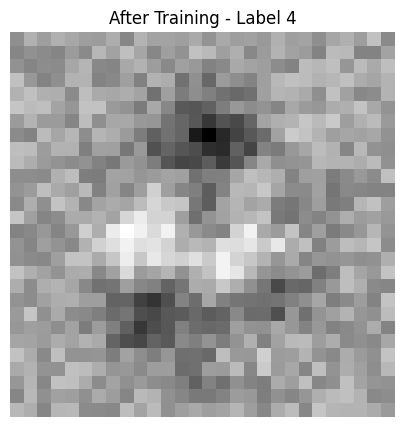

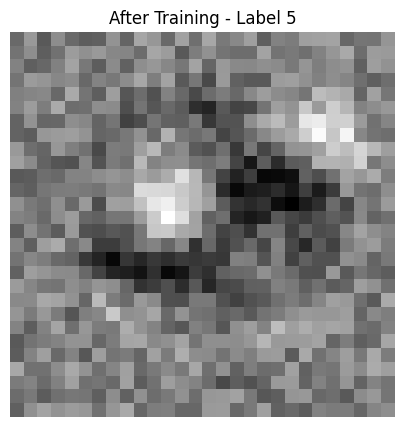

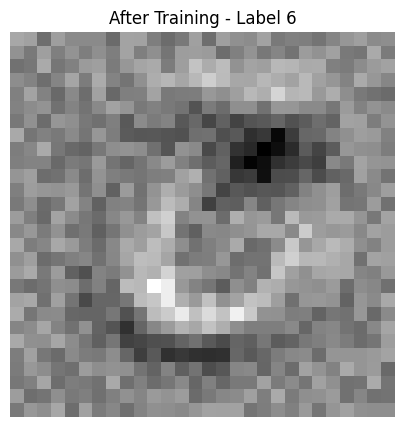

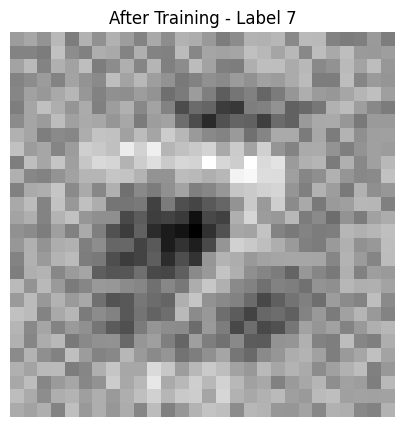

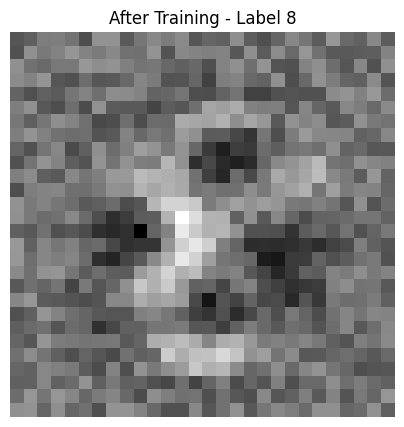

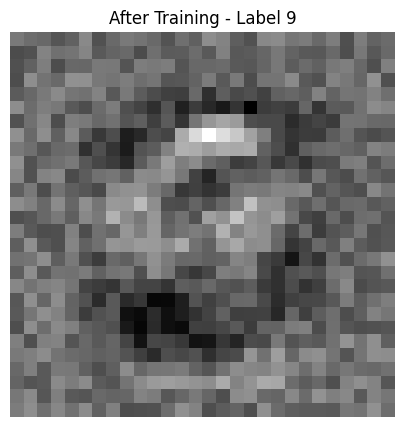

Validation Loss After Training: 0.1000


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST validation dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
validation_loader = DataLoader(validation_dataset, batch_size=len(validation_dataset), shuffle=False)

# Extract validation set images and labels
images, labels = next(iter(validation_loader))

# Define a 1-layer neural network
class OneLayerNN(nn.Module):
    def __init__(self):
        super(OneLayerNN, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)

    def forward(self, x):
        return self.linear(x)

# Initialize the 1-layer neural network
model = OneLayerNN()

# Before training (randomly initialized weights)
before_train_weights = model.linear.weight.data.clone().numpy()
criterion = nn.BCEWithLogitsLoss()
before_train_outputs = model(images.view(-1, 28 * 28))
before_train_loss = criterion(before_train_outputs, torch.nn.functional.one_hot(labels, num_classes=10).float())

print(f'Validation Loss Before Training: {before_train_loss.item():.4f}')

# Train until validation loss < 0.1
optimizer = optim.SGD(model.parameters(), lr=0.01)
max_epochs = 10000  # Maximum number of epochs for demonstration

for epoch in range(max_epochs):
    optimizer.zero_grad()
    outputs = model(images.view(-1, 28 * 28))
    before_train_loss = criterion(outputs, torch.nn.functional.one_hot(labels, num_classes=10).float())
    before_train_loss.backward()
    optimizer.step()

    # Print validation loss and break if it's less than 0.1
    print(f"Validation Loss after {epoch + 1} epochs: {before_train_loss.item():.4f}")

    if before_train_loss.item() < 0.1:
        print("Training stopped as validation loss is less than 0.1")
        break

# Display weights before training
for label in range(10):
    plt.figure(figsize=(5, 5))
    plt.title(f'Before Training - Label {label}')
    plt.imshow(before_train_weights[label].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# Train until validation loss < 0.1
optimizer = optim.SGD(model.parameters(), lr=0.01)

# After training
after_train_weights = model.linear.weight.data.clone().numpy()
after_train_outputs = model(images.view(-1, 28 * 28))
after_train_loss = criterion(after_train_outputs, torch.nn.functional.one_hot(labels, num_classes=10).float())

# Display weights after training
for label in range(10):
    plt.figure(figsize=(5, 5))
    plt.title(f'After Training - Label {label}')
    plt.imshow(after_train_weights[label].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

print(f'Validation Loss After Training: {after_train_loss.item():.4f}')


**One word**: Linear

### 4. CNN (13 points)

`Build your own CNN from scratch (3 points)` to solve this classification problem. Choose any optimizer and criterion that you want. Regulate your CNN structure and try to have as good result as possible.


**`Required outputs`**: (0.5+1+1+2+1 = 5.5 points)
1. Print the number of parameters of your cnn model.
2. Print averaged train loss and validation loss at the end of each epoch.
3. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
4. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction.
5. Display the confusion matrix of your best model on the test set.
6. `Save your best model and attach it in your submitted zip`.


4.5 points are given according to your test performance. `4.5 is given if you have correct test prediction rate > 97.00%.`

[Hint]:
1. If you use batch normalizations, be aware of what BatchNorm does while fed with data (you will need to add two lines of codes to manage your training and testing).
1. As for confusion matrix (multi-class classfication), consider a $10\times 10$ matrix where each row represents "gt is" and each column represents "is predicted as", then do a counting with all the test samples. You will obtain a gray-scale image (2D matrix).





------------------------------------------------------------------------------------------------------------------------------------------------
`Discussion for computational cost`:

If you have NVIDIA card on your PC, you can use `cuda` to accelerate the calculation. However, theoretically, `2 layers of CNN are enough` to have at least 97% test accuracy for this exercise.

If your PC has no worse than Intel Core i5-8250U Processor (as had the TA's PC in 2019) and your code is well done, the program shall be guaranteed to run fast.

Conventionally, `you are encouraged to construct not too complicated CNN` to save computational cost, since MNIST is a relatively simple problem. However, `as long as your code works out for you, no point will be removed if your CNN is huge`.

------------------------------------------------------------------------------------------------------------------------------------------------


Number of parameters in the model: 206922
Epoch 1/10, Train Loss: 0.1861, Validation Loss: 0.0675
Epoch 2/10, Train Loss: 0.0531, Validation Loss: 0.0439
Epoch 3/10, Train Loss: 0.0366, Validation Loss: 0.0434
Epoch 4/10, Train Loss: 0.0277, Validation Loss: 0.0374
Epoch 5/10, Train Loss: 0.0222, Validation Loss: 0.0323
Epoch 6/10, Train Loss: 0.0177, Validation Loss: 0.0297
Epoch 7/10, Train Loss: 0.0145, Validation Loss: 0.0312
Epoch 8/10, Train Loss: 0.0100, Validation Loss: 0.0326
Epoch 9/10, Train Loss: 0.0105, Validation Loss: 0.0365
Epoch 10/10, Train Loss: 0.0091, Validation Loss: 0.0454


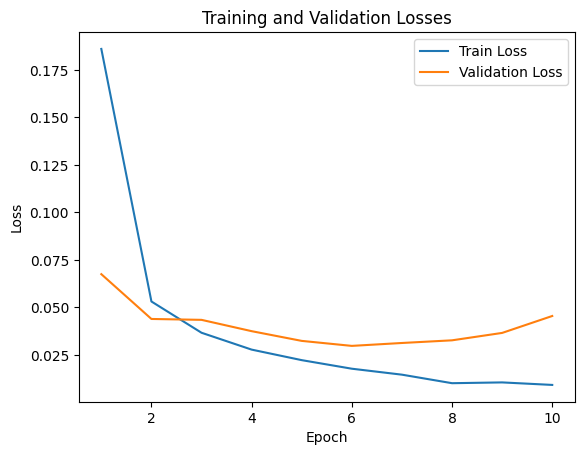

Best Model - Test Loss: 0.0008
Best Model - Accuracy: 100.00%
Best Model - Confusion Matrix:
[[ 6  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  7]]


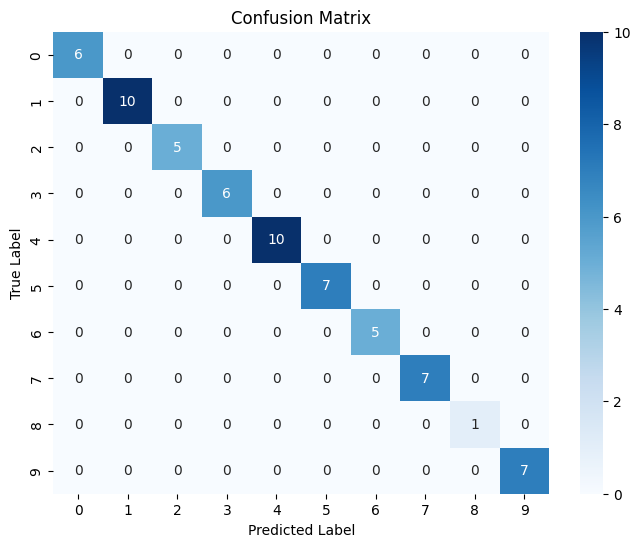

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(123)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
validation_loader = DataLoader(validation_dataset, batch_size=len(validation_dataset), shuffle=False)

# Initialize the CNN model
model = SimpleCNN()

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Count the number of parameters
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters in the model: {num_params}")

# Training loop
num_epochs = 10
train_losses = []
validation_losses = []

# Initialize variables to track the best model
best_model_state = None
best_validation_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_train_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_train_loss += loss.item() * images.size(0)

    # Calculate average training loss for the epoch
    average_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(average_train_loss)

    # Validation loss
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        images_val, labels_val = next(iter(validation_loader))
        images_val, labels_val = images_val.to(device), labels_val.to(device)

        outputs_val = model(images_val)
        validation_loss = criterion(outputs_val, labels_val)
        validation_losses.append(validation_loss.item())

        # Check if current model has the best validation loss
        if validation_loss < best_validation_loss:
            best_validation_loss = validation_loss
            best_model_state = model.state_dict()

    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Train Loss: {average_train_loss:.4f}, "
          f"Validation Loss: {validation_loss.item():.4f}")

# Plot the training and validation losses
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Load the saved best model
best_model = SimpleCNN()
best_model.load_state_dict(best_model_state)
best_model.to(device)

# Test the best model on the test set
best_model.eval()
with torch.no_grad():
    images_test, labels_test = next(iter(test_loader))
    images_test, labels_test = images_test.to(device), labels_test.to(device)

    outputs_test = best_model(images_test)
    test_loss = criterion(outputs_test, labels_test)
    _, predicted = torch.max(outputs_test, 1)

# Calculate accuracy and confusion matrix for the best model
accuracy = (predicted == labels_test).sum().item() / len(labels_test)
conf_matrix = confusion_matrix(labels_test.cpu().numpy(), predicted.cpu().numpy())

# Print results for the best model
print(f"Best Model - Test Loss: {test_loss.item():.4f}")
print(f"Best Model - Accuracy: {accuracy * 100:.2f}%")
print("Best Model - Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Save the best model
torch.save(best_model.state_dict(), 'best_simple_cnn_model.pth')

# Load the saved best model
loaded_best_model = SimpleCNN()
loaded_best_model.load_state_dict(torch.load('best_simple_cnn_model.pth'))
loaded_best_model.to(device)
